In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Функция для чтения csv файла и создания датафрейма согласно 1-3 пункту.

In [2]:
def read_and_create_dataframe(file_path):
    """
    Читает файл и записывает данные в таблицу.
    """
    df = pd.read_csv(file_path, header=None)
    df.columns = ['Date', 'Day Temperature', 'Day Pressure', 'Day Wind', 'Night Temperature', 'Night Pressure', 'Night Wind']
    if not ((df.isnull().sum()).eq(0).all()):
        df.dropna(inplace=True, ignore_index=True)
    return df

In [3]:
df = read_and_create_dataframe("dataset.csv")
print(df)

            Date  Day Temperature Day Pressure Day Wind  Night Temperature  \
0     2008-01-10            -20.0          765   В 2м/с              -22.0   
1     2008-01-11            -20.0          764        Ш              -24.0   
2     2008-01-12            -20.0          762   З 2м/с              -20.0   
3     2008-01-13             -9.0          756  ЮЗ 3м/с               -7.0   
4     2008-01-14             -6.0          751  ЮЗ 2м/с               -4.0   
...          ...              ...          ...      ...                ...   
5769  2023-12-03             -6.0          752   В 3м/с               -5.0   
5770  2023-12-04              0.0          744   З 4м/с               -4.0   
5771  2023-12-05             -7.0          752   З 2м/с               -8.0   
5772  2023-12-06             -9.0          761  СЗ 2м/с               -9.0   
5773  2023-12-07            -10.0          767  СВ 2м/с              -14.0   

      Night Pressure Night Wind  
0              765.0     В 2м

Добавление столбика с температурой по Фарингейту

In [4]:
def read_and_create_dataframe(file_path):
    """
    Читает файл и записывает данные в таблицу.
    """
    df = pd.read_csv(file_path, header=None)
    df.columns = ['Date', 'Day Temperature', 'Day Pressure', 'Day Wind', 'Night Temperature', 'Night Pressure', 'Night Wind']
    if not ((df.isnull().sum()).eq(0).all()):
        df.dropna(inplace=True, ignore_index=True)
    df['Day Temperature Fahrenheit'] = 9/5 * df['Day Temperature'] + 32
    df['Night Temperature Fahrenheit'] = 9/5 * df['Night Temperature'] + 32
    return df

In [5]:
df = read_and_create_dataframe("dataset.csv")
print(df)

            Date  Day Temperature Day Pressure Day Wind  Night Temperature  \
0     2008-01-10            -20.0          765   В 2м/с              -22.0   
1     2008-01-11            -20.0          764        Ш              -24.0   
2     2008-01-12            -20.0          762   З 2м/с              -20.0   
3     2008-01-13             -9.0          756  ЮЗ 3м/с               -7.0   
4     2008-01-14             -6.0          751  ЮЗ 2м/с               -4.0   
...          ...              ...          ...      ...                ...   
5769  2023-12-03             -6.0          752   В 3м/с               -5.0   
5770  2023-12-04              0.0          744   З 4м/с               -4.0   
5771  2023-12-05             -7.0          752   З 2м/с               -8.0   
5772  2023-12-06             -9.0          761  СЗ 2м/с               -9.0   
5773  2023-12-07            -10.0          767  СВ 2м/с              -14.0   

      Night Pressure Night Wind  Day Temperature Fahrenheit  \


Вычисление статистической информации для столбцов

In [6]:
def get_statistic(dataframe: pd.DataFrame, column_name: str) -> pd.Series:
    """
    Получает статистическую информацию
    """
    if column_name in dataframe.columns:
        return dataframe[column_name].describe()

In [7]:
print(get_statistic(df, "Day Temperature"))

count    5774.00000
mean        9.78282
std        14.01747
min       -27.00000
25%        -2.00000
50%        10.00000
75%        22.00000
max        40.00000
Name: Day Temperature, dtype: float64


Фильтрация температуры

In [8]:
def get_filtered_date_info(df: pd.DataFrame, value: float) -> pd.DataFrame:
    """
    Фильтрация по значения температуры
    """
    return df.loc[df['Day Temperature'] >= value]

In [9]:
print(get_filtered_date_info(df, 20))

            Date  Day Temperature Day Pressure Day Wind  Night Temperature  \
87    2008-04-06             20.0          753  ЮЗ 2м/с               16.0   
88    2008-04-07             20.0          755   Ю 3м/с               16.0   
90    2008-04-09             20.0          753   Ю 3м/с               15.0   
91    2008-04-10             21.0          752   Ю 2м/с               17.0   
92    2008-04-11             22.0          750   Ю 3м/с               14.0   
...          ...              ...          ...      ...                ...   
5706  2023-09-25             25.0          758   З 3м/с               20.0   
5707  2023-09-26             21.0          759   С 2м/с               16.0   
5710  2023-09-29             20.0          751  СЗ 2м/с               15.0   
5712  2023-10-01             20.0          752   Ю 2м/с               17.0   
5713  2023-10-02             21.0          749   Ю 2м/с               15.0   

      Night Pressure Night Wind  Day Temperature Fahrenheit  \


Фильтрация по дате

In [10]:
def get_filtered_by_date_info(df: pd.DataFrame, startdate: str, enddate: str) -> pd.DataFrame:
    """
    Фильтрация по значению даты
    """
    df= df.loc[(df['Date'] >= startdate) & (df['Date'] <=enddate)]
    return df 

In [11]:
print(get_filtered_by_date_info(df, "2022-01-01", "2023-01-01"))

            Date  Day Temperature Day Pressure Day Wind  Night Temperature  \
5076  2022-01-01             -4.0          743   Ю 1м/с               -3.0   
5077  2022-01-02             -3.0          734   З 2м/с               -8.0   
5078  2022-01-03            -11.0          740   З 2м/с              -16.0   
5079  2022-01-04            -15.0          741   В 2м/с              -14.0   
5080  2022-01-05            -16.0          749   З 1м/с              -19.0   
...          ...              ...          ...      ...                ...   
5436  2022-12-28             -6.0          753   В 2м/с               -9.0   
5437  2022-12-29             -7.0          751   В 1м/с               -7.0   
5438  2022-12-30             -6.0          755   В 1м/с               -5.0   
5439  2022-12-31             -3.0          751   В 3м/с               -2.0   
5440  2023-01-01              0.0          750  ЮЗ 1м/с                0.0   

      Night Pressure Night Wind  Day Temperature Fahrenheit  \


Средняя температура за месяц

In [12]:

def get_avg_temperature_by_month(df):
    """
    Функция группирует данные по столбцу и вычисляет средние значения для столбцов "Day Temperature" и "Night Temperature".
    """
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.month
    df_avg = df.groupby('Month').agg({'Day Temperature': 'mean', 'Night Temperature': 'mean'}).reset_index()
    return df_avg


In [13]:
print(get_avg_temperature_by_month(df))

    Month  Day Temperature  Night Temperature
0       1        -9.078351         -10.268041
1       2        -6.585366          -8.849224
2       3         0.502016          -2.308468
3       4        11.815514           8.285115
4       5        20.721774          16.036290
5       6        24.027197          19.311715
6       7        26.853659          21.987805
7       8        25.918864          20.450304
8       9        17.768421          13.473684
9      10         9.174797           6.536585
10     11         0.511727          -0.597015
11     12        -6.325532          -7.097872


График, показываюищй изменение температуры за все время.

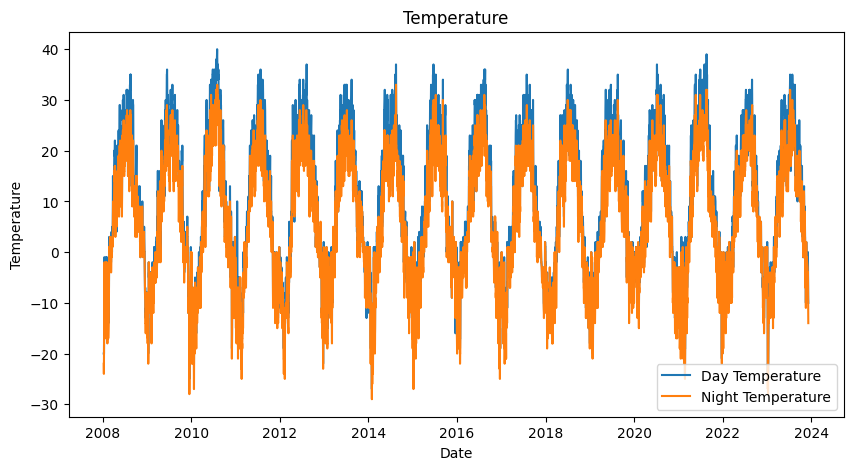

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Day Temperature'], label='Day Temperature')
plt.plot(df['Date'], df['Night Temperature'], label='Night Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature')
plt.legend()
plt.show()

Создание графика

In [15]:
def get_plot_temperature_statistics(df, year, month):
    """
    Создает график, на котором отображаются изменения температуры днем и ночью за указанный месяц
    """
    selected_data = df[(df['Date'].dt.year == year) & (df['Date'].dt.month == month)]
    plt.figure(figsize=(10, 5))
    plt.plot(selected_data['Date'], selected_data['Day Temperature'], label='Day Temperature')
    plt.plot(selected_data['Date'], selected_data['Night Temperature'], label='Night Temperature')
    plt.axhline(y=selected_data['Day Temperature'].median(), color='r', linestyle='--', label='Median Day Temp')
    plt.axhline(y=selected_data['Night Temperature'].median(), color='b', linestyle='--', label='Median Night Temp')
    plt.axhline(y=selected_data['Day Temperature'].mean(), color='g', linestyle='-.', label='Mean Day Temp')
    plt.axhline(y=selected_data['Night Temperature'].mean(), color='m', linestyle='-.', label='Mean Night Temp')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.title(f'Temperature Statistics for {month}/{year}')
    plt.legend()
    plt.show()


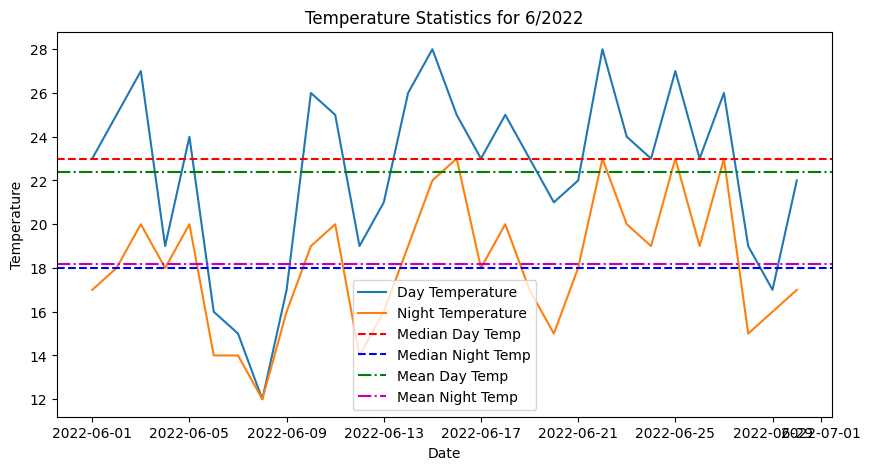

In [16]:
get_plot_temperature_statistics(df, 2022, 6)